In [1]:
# Cell 1: Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter



In [2]:

# Cell 2: Set paths and style
data_dir = '../data/raw'
classes = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")



In [3]:
# Cell 3: Count images per class
print("=" * 60)
print("DATASET STATISTICS")
print("=" * 60)

class_counts = {}
for cls in classes:
    path = os.path.join(data_dir, cls, 'images')
    if os.path.exists(path):
        count = len(os.listdir(path))
        class_counts[cls] = count
        print(f"{cls:20} : {count:5} images")
    else:
        print(f"{cls:20} : NOT FOUND!")

total = sum(class_counts.values())
print(f"\n{'TOTAL':20} : {total:5} images")
print("=" * 60)


DATASET STATISTICS
COVID                :  3616 images
Normal               : 10192 images
Lung_Opacity         :  6012 images
Viral Pneumonia      :  1345 images

TOTAL                : 21165 images


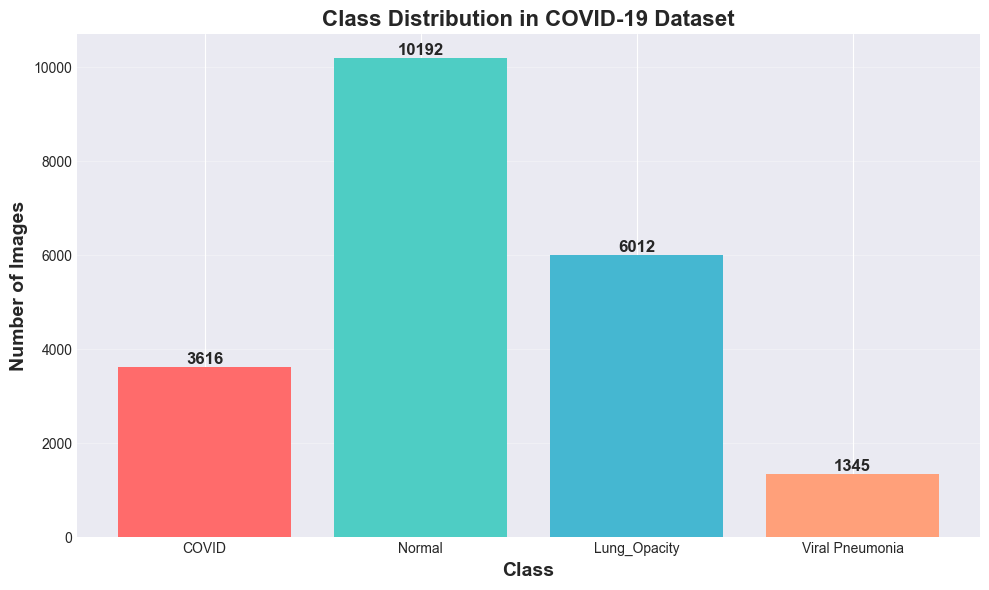

In [4]:

# Cell 4: Visualize class distribution
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(class_counts.keys(), class_counts.values(), 
              color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Class', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Images', fontsize=14, fontweight='bold')
ax.set_title('Class Distribution in COVID-19 Dataset', fontsize=16, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:

# Cell 5: Calculate class imbalance
print("\nClass Imbalance Analysis:")
print("-" * 40)
for cls, count in class_counts.items():
    percentage = (count / total) * 100
    print(f"{cls:20} : {percentage:5.2f}%")



Class Imbalance Analysis:
----------------------------------------
COVID                : 17.08%
Normal               : 48.15%
Lung_Opacity         : 28.41%
Viral Pneumonia      :  6.35%


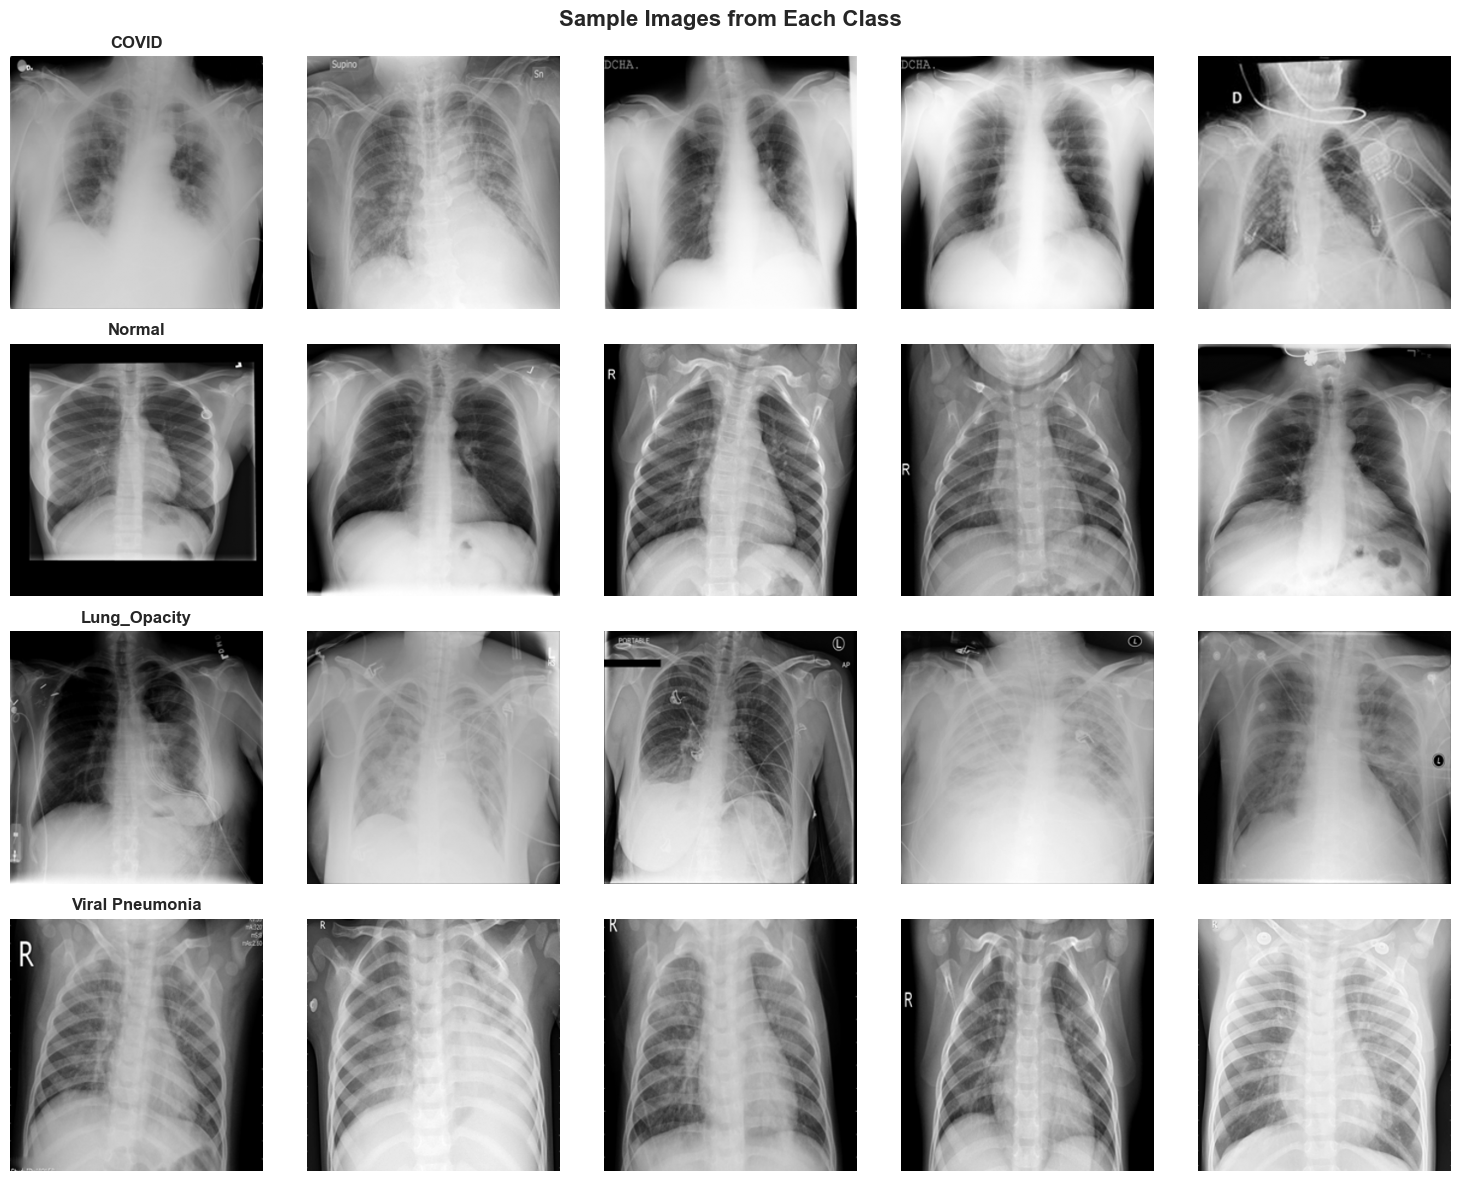

In [6]:

# Cell 6: Visualize sample images from each class
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
fig.suptitle('Sample Images from Each Class', fontsize=16, fontweight='bold')

for idx, cls in enumerate(classes):
    img_dir = os.path.join(data_dir, cls, 'images')
    images = os.listdir(img_dir)[:5]  # Get first 5 images
    
    for i, img_name in enumerate(images):
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path)
        
        axes[idx, i].imshow(img, cmap='gray')
        axes[idx, i].axis('off')
        
        if i == 0:  # Add class name to first image
            axes[idx, i].set_title(cls, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/plots/sample_images.png', dpi=300, bbox_inches='tight')
plt.show()



In [7]:
# Cell 7: Image size analysis
print("\nAnalyzing image dimensions...")
img_sizes = []

for cls in classes:
    img_dir = os.path.join(data_dir, cls, 'images')
    images = os.listdir(img_dir)[:100]  # Sample 100 images per class
    
    for img_name in images:
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path)
        img_sizes.append(img.size)

img_sizes = np.array(img_sizes)

print("\nImage Size Statistics:")
print("-" * 40)
print(f"Mean size    : {img_sizes.mean(axis=0)}")
print(f"Median size  : {np.median(img_sizes, axis=0)}")
print(f"Min size     : {img_sizes.min(axis=0)}")
print(f"Max size     : {img_sizes.max(axis=0)}")
print(f"Std dev      : {img_sizes.std(axis=0)}")



Analyzing image dimensions...

Image Size Statistics:
----------------------------------------
Mean size    : [299. 299.]
Median size  : [299. 299.]
Min size     : [299 299]
Max size     : [299 299]
Std dev      : [0. 0.]


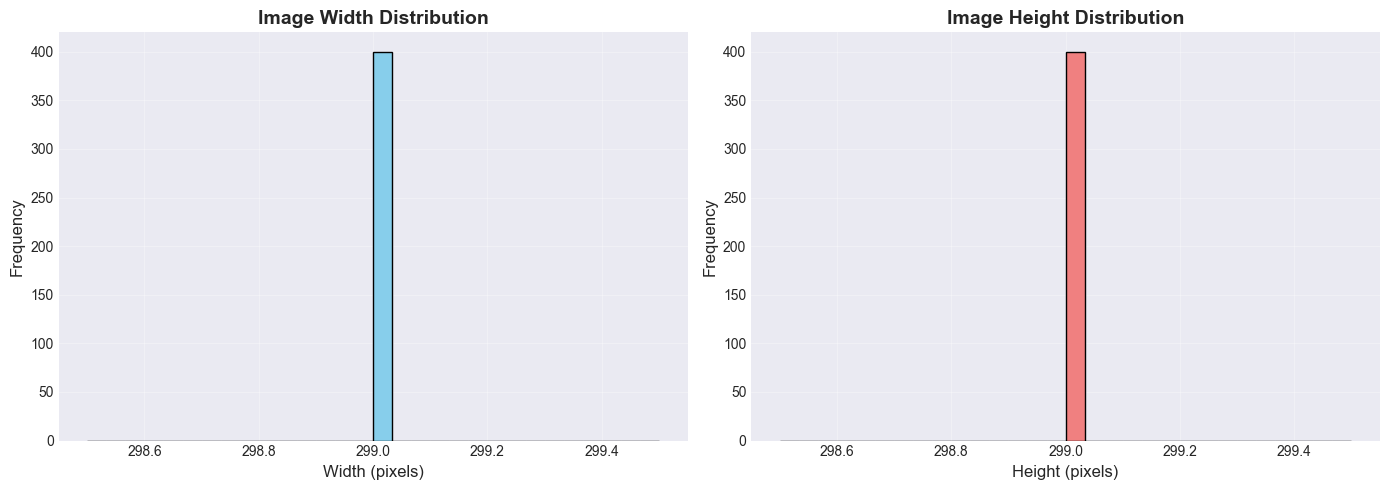

In [8]:

# Cell 8: Width and Height distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(img_sizes[:, 0], bins=30, color='skyblue', edgecolor='black')
ax1.set_xlabel('Width (pixels)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Image Width Distribution', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

ax2.hist(img_sizes[:, 1], bins=30, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Height (pixels)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Image Height Distribution', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/plots/image_size_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:

# Cell 9: Summary and recommendations
print("\n" + "=" * 60)
print("SUMMARY & RECOMMENDATIONS")
print("=" * 60)

print(f"""
✅ Dataset loaded successfully
✅ Total images: {total}
✅ Number of classes: {len(classes)}

⚠️ CLASS IMBALANCE DETECTED:
   - Normal class has {class_counts['Normal']} images (largest)
   - Viral Pneumonia has {class_counts['Viral Pneumonia']} images (smallest)
   - Imbalance ratio: {class_counts['Normal'] / class_counts['Viral Pneumonia']:.2f}x
""")

print("=" * 60)


SUMMARY & RECOMMENDATIONS

✅ Dataset loaded successfully
✅ Total images: 21165
✅ Number of classes: 4

⚠️ CLASS IMBALANCE DETECTED:
   - Normal class has 10192 images (largest)
   - Viral Pneumonia has 1345 images (smallest)
   - Imbalance ratio: 7.58x

